In [1]:
#! pip install tensorflow
#! pip install pyqt5
#! pip install numpy
#! pip install opencv-python
#! pip install PIL
#! pip install segmentation-models

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no lon

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-co

In [3]:
import numpy
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from segmentation_models import Unet
from segmentation_models.metrics import IOUScore
from segmentation_models.losses import JaccardLoss
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Segmentation Models: using `keras` framework.


In [3]:
path = ''

img_size = (128,128)
batch_size = 64
seed = 1

image_datagen = ImageDataGenerator(rescale=1./255)
mask_datagen = ImageDataGenerator(rescale=1./255)

#train images and their masks
train_image_generator = image_datagen.flow_from_directory(
                        path,
                        classes=['xtrain'],
                        target_size=img_size,
                        batch_size=batch_size,
                        class_mode=None, # None because we dont want labels to be returned, just images.
                        seed=seed, 
                        shuffle=False,
                        color_mode='rgb')

train_mask_generator = mask_datagen.flow_from_directory(
                        path,
                        classes=['ytrain'],
                        target_size=img_size,
                        batch_size=batch_size,
                        class_mode=None,# None because we dont want labels to be returned, just images.
                        seed=seed,
                        shuffle=False,
                        color_mode='grayscale')

train_generator = zip(train_image_generator, train_mask_generator)

val_image_generator = image_datagen.flow_from_directory(
                        path,
                        classes=['xtest'],
                        target_size=img_size,
                        batch_size=batch_size,
                        class_mode=None,# None because we dont want labels to be returned, just images.
                        seed=seed,
                        shuffle=False,
                        color_mode='rgb')

val_mask_generator = mask_datagen.flow_from_directory(
                        path,
                        classes=['ytest'],
                        target_size=img_size,
                        batch_size=batch_size,
                        class_mode=None, # None because we dont want labels to be returned, just images.
                        seed=seed,
                        shuffle=False,
                        color_mode='grayscale')

validation_generator = zip(val_image_generator, val_mask_generator)

Found 18698 images belonging to 1 classes.
Found 18698 images belonging to 1 classes.
Found 3740 images belonging to 1 classes.
Found 3740 images belonging to 1 classes.


In [4]:
import segmentation_models as sm

sm.set_framework('tf.keras')

sm.framework()

'tf.keras'

In [5]:
model = Unet(encoder_freeze=True)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   1792        ['input_1[0][0]']                
                                64)                                                               
                                                                                                  
 block1_conv2 (Conv2D)          (None, None, None,   36928       ['block1_conv1[0][0]']           
                                64)                                                           

                                                                  'block5_conv3[0][0]']           
                                                                                                  
 decoder_stage0a_conv (Conv2D)  (None, None, None,   2359296     ['decoder_stage0_concat[0][0]']  
                                256)                                                              
                                                                                                  
 decoder_stage0a_bn (BatchNorma  (None, None, None,   1024       ['decoder_stage0a_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 decoder_stage0a_relu (Activati  (None, None, None,   0          ['decoder_stage0a_bn[0][0]']     
 on)                            256)                                                              
          

 decoder_stage3a_relu (Activati  (None, None, None,   0          ['decoder_stage3a_bn[0][0]']     
 on)                            32)                                                               
                                                                                                  
 decoder_stage3b_conv (Conv2D)  (None, None, None,   9216        ['decoder_stage3a_relu[0][0]']   
                                32)                                                               
                                                                                                  
 decoder_stage3b_bn (BatchNorma  (None, None, None,   128        ['decoder_stage3b_conv[0][0]']   
 lization)                      32)                                                               
                                                                                                  
 decoder_stage3b_relu (Activati  (None, None, None,   0          ['decoder_stage3b_bn[0][0]']     
 on)      

In [6]:
loss_func = JaccardLoss(per_image=True)
metric = IOUScore(per_image=True)

In [7]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [8]:
model.compile(loss = loss_func, optimizer="adam", metrics=[metric])

In [9]:
model_history = model.fit(train_generator, steps_per_epoch = 277, validation_data=validation_generator,
           validation_steps = 16, batch_size=64, epochs=5, callbacks=[callback])

Epoch 1/5
277/277 [==============================] - 9473s 34s/step - loss: 0.1041 - iou_score: 0.8959 - val_loss: 0.0548 - val_iou_score: 0.9452
Epoch 2/5
277/277 [==============================] - 15319s 55s/step - loss: 0.0554 - iou_score: 0.9446 - val_loss: 0.0373 - val_iou_score: 0.9627
Epoch 3/5
277/277 [==============================] - 13818s 50s/step - loss: 0.0454 - iou_score: 0.9546 - val_loss: 0.0353 - val_iou_score: 0.9647
Epoch 4/5
277/277 [==============================] - 4543s 16s/step - loss: 0.0391 - iou_score: 0.9610 - val_loss: 0.0339 - val_iou_score: 0.9652
Epoch 5/5
277/277 [==============================] - 2450s 9s/step - loss: 0.0353 - iou_score: 0.9647 - val_loss: 0.0325 - val_iou_score: 0.9675


In [10]:
model.save('trained_model')

INFO:tensorflow:Assets written to: trained_model\assets


INFO:tensorflow:Assets written to: trained_model\assets


In [9]:
model = tf.keras.models.load_model('model_test', compile=False,  ) 

In [10]:
model.compile(loss = loss_func, optimizer="adam", metrics=[metric])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   1792        ['input_1[0][0]']                
                                64)                                                               
                                                                                                  
 block1_conv2 (Conv2D)          (None, None, None,   36928       ['block1_conv1[0][0]']           
                                64)                                                           

                                                                  'block5_conv3[0][0]']           
                                                                                                  
 decoder_stage0a_conv (Conv2D)  (None, None, None,   2359296     ['decoder_stage0_concat[0][0]']  
                                256)                                                              
                                                                                                  
 decoder_stage0a_bn (BatchNorma  (None, None, None,   1024       ['decoder_stage0a_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 decoder_stage0a_relu (Activati  (None, None, None,   0          ['decoder_stage0a_bn[0][0]']     
 on)                            256)                                                              
          

 decoder_stage3a_relu (Activati  (None, None, None,   0          ['decoder_stage3a_bn[0][0]']     
 on)                            32)                                                               
                                                                                                  
 decoder_stage3b_conv (Conv2D)  (None, None, None,   9216        ['decoder_stage3a_relu[0][0]']   
                                32)                                                               
                                                                                                  
 decoder_stage3b_bn (BatchNorma  (None, None, None,   128        ['decoder_stage3b_conv[0][0]']   
 lization)                      32)                                                               
                                                                                                  
 decoder_stage3b_relu (Activati  (None, None, None,   0          ['decoder_stage3b_bn[0][0]']     
 on)      

In [21]:
import numpy as np
path_test_img = 'image1.jpg'

img_test_orig = cv2.imread(path_test_img)
h, w = img_test_orig.shape[0:2]

img_test_resized = cv2.resize(img_test_orig, (128,128))
img_test = np.asarray(img_test_resized)/255.0
img_test = img_test[np.newaxis,...]
print(img_test.shape)


(1, 128, 128, 3)


In [22]:
pred_img = model.predict(img_test)
print(pred_img.shape)

(1, 128, 128, 1)


In [23]:
pred_img = np.squeeze(pred_img)

result = img_test_resized.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGBA)

pred_img_copy = pred_img.copy()
pred_img = cv2.resize(pred_img, (w,h))

pred_img_copy[pred_img_copy<0.5] = 0
pred_img_copy[pred_img_copy>=0.5] = 255 
print("Shape of result: " , result.shape)
print("Shape of pred_img_copy: " , pred_img_copy.shape)

result[:, :, 3] = pred_img_copy
result = cv2.resize(result, (w,h)) 
print("bg_removed shape: " , result.shape)

Shape of result:  (128, 128, 4)
Shape of pred_img_copy:  (128, 128)
bg_removed shape:  (1080, 1920, 4)


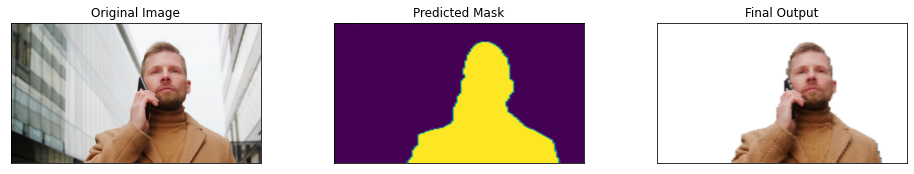

In [24]:
fig = plt.figure(figsize=(28, 15))
  
rows = 5
columns = 5

fig.add_subplot(rows, columns, 1)
plt.imshow(cv2.cvtColor(img_test_orig, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([]) 
plt.title("Original Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(pred_img)
plt.xticks([]), plt.yticks([]) 
plt.title("Predicted Mask")

fig.add_subplot(rows, columns, 3)
plt.imshow(result)
plt.xticks([]), plt.yticks([])
plt.title("Final Output")

plt.show()